In [1]:
%%capture
%load_ext autoreload
%autoreload 2
import itertools as itt
import os
import sys
import holoviews as hv
import numpy as np
import xarray as xr
from dask.distributed import Client, LocalCluster
from holoviews.operation.datashader import datashade, regrid
from holoviews.util import Dynamic
from IPython.core.display import display
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [2]:
# Importing the custom helper functions
from calcium_behavior_alignment import *

from minian.utilities import (
    TaskAnnotation,
    get_optimal_chk,
    load_videos,
    open_minian,
    save_minian,
)

## Step 0 Initialize Variables

In [3]:
# exp_path = "/scratch/09117/xz6783/minian/Satiation/"
# id_path = "/scratch/09117/xz6783/minian/Satiation/Session Combined/"
# beh_path = "/scratch/09117/xz6783/minian/Behavior_Files/"
experiment = "Satiation Protocol"

exp_path = "/scratch/09656/dhh3/Satiation/"
id_path = "/scratch/09656/dhh3/calcium-behavior-alignment/"
beh_path = "/scratch/09656/dhh3/Behavior_Files/"

minian_path = "."

files = os.listdir(id_path)

animal_ids = [file for file in files if os.path.isdir(os.path.join(id_path, file)) and len(file) == 3 and file[0].isdigit()]

print(len(animal_ids))
animal_ids

16


['4N6',
 '2I5',
 '4B6',
 '5B6',
 '2S5',
 '1H6',
 '7M6',
 '7B6',
 '1I5',
 '1B6',
 '6M6',
 '6S5',
 '2N6',
 '2Z4',
 '8H6',
 '1S5']

In [32]:
# animal_id ="7B6"   #change name for each animal
# minian_path = "."
# dpath = "/scratch/09656/dhh3/Satiation/Session Combined/1B6/"
# minian_ds_path = os.path.join(dpath, "minian")
# intpath = "./minian_intermediate"

# #change for each experiment:
# output_path_spike = r"E:\Xu\Miniscope\PL\Raw Data\Satiation\Session Combined\Spikes"   
# output_path_calcium = r"E:\Xu\Miniscope\PL\Raw Data\Satiation\Session Combined\Calcium"   
# output_path_calcium_hungry = r"E:\Xu\Miniscope\PL\Raw Data\Satiation\Session Combined\Calcium\Hungry"
# output_path_calcium_satiated = r"E:\Xu\Miniscope\PL\Raw Data\Satiation\Session Combined\Calcium\Satiated"

# subset1 = dict(frame=slice(0,23237))
# subset2 = dict(frame=slice(23238, None))



# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["MINIAN_INTERMEDIATE"] = intpath

In [20]:
# # Set up Initial Basic Parameters#
# minian_path = "."
# dpath = "."
# minian_ds_path = os.path.join(dpath, "minian")
# intpath = "./minian_intermediate"
# subset = dict(frame=slice(0, None))
# subset_mc = None
# interactive = True
# output_size = 100
# n_workers = int(os.getenv("MINIAN_NWORKERS", 30))
# param_save_minian = {
#     "dpath": minian_ds_path,
#     "meta_dict": dict(session=-1, animal=-2),
#     "overwrite": True,
# }

# # Pre-processing Parameters#
# param_load_videos = {
#     "pattern": "[0-9]+\.avi$",
#     "dtype": np.uint8,
#     "downsample": dict(frame=1, height=1, width=1),
#     "downsample_strategy": "subset",
# }
# param_denoise = {"method": "median", "ksize": 7}
# param_background_removal = {"method": "tophat", "wnd": 15}

# # Motion Correction Parameters#
# subset_mc = None
# param_estimate_motion = {"dim": "frame"}

# # Initialization Parameters#
# param_seeds_init = {
#     "wnd_size": 1000,
#     "method": "rolling",
#     "stp_size": 500,
#     "max_wnd": 15,
#     "diff_thres": 3,
# }
# param_pnr_refine = {"noise_freq": 0.06, "thres": 1}
# param_ks_refine = {"sig": 0.05}
# param_seeds_merge = {"thres_dist": 10, "thres_corr": 0.8, "noise_freq": 0.06}
# param_initialize = {"thres_corr": 0.8, "wnd": 10, "noise_freq": 0.06}
# param_init_merge = {"thres_corr": 0.8}

# # CNMF Parameters#
# param_get_noise = {"noise_range": (0.06, 0.5)}
# param_first_spatial = {
#     "dl_wnd": 10,
#     "sparse_penal": 0.01,
#     "size_thres": (25, None),
# }
# param_first_temporal = {
#     "noise_freq": 0.06,
#     "sparse_penal": 1,
#     "p": 1,
#     "add_lag": 20,
#     "jac_thres": 0.2,
# }
# param_first_merge = {"thres_corr": 0.8}
# param_second_spatial = {
#     "dl_wnd": 10,
#     "sparse_penal": 0.01,
#     "size_thres": (25, None),
# }
# param_second_temporal = {
#     "noise_freq": 0.06,
#     "sparse_penal": 1,
#     "p": 1,
#     "add_lag": 20,
#     "jac_thres": 0.4,
# }

# os.environ["OMP_NUM_THREADS"] = "1"
# os.environ["MKL_NUM_THREADS"] = "1"
# os.environ["OPENBLAS_NUM_THREADS"] = "1"
# os.environ["MINIAN_INTERMEDIATE"] = intpath

In [4]:
dpath = os.path.abspath(dpath)
hv.notebook_extension("bokeh", width=100)

NameError: name 'dpath' is not defined

## Step 1: Parse Scope Times

In [4]:
# Parsing
scope_times = parse_scope_times(exp_path=exp_path,
                               id_path=id_path)

scope_times

{'4N6': {'4N6_2023_06_29_13_41_25':        Frame Number  Time Stamp (s)  Buffer Index
  0                 0          -0.032             0
  1                 1           0.019             0
  2                 2           0.069             0
  3                 3           0.119             0
  4                 4           0.169             0
  ...             ...             ...           ...
  89385         89385        4526.979             0
  89386         89386        4527.029             0
  89387         89387        4527.080             0
  89388         89388        4527.131             0
  89389         89389        4527.180             0
  
  [89390 rows x 3 columns]},
 '2I5': {'2I5_2021_11_11_13_15_09':        Frame Number  Time Stamp (s)  Buffer Index
  0                 0          -0.001             0
  1                 1           0.052             0
  2                 2           0.143             0
  3                 3           0.172             0
  4             

## Step 2: Process animal data based on ID

In [5]:
behavior_dict = parse_behavior_times(beh_path=beh_path, experiment=experiment, animal_ids=animal_ids)

In [6]:
behavior_dict['5B6']

,Time (s),Speed (m/s),Freezing,In Food Area,Bar Press active,Miniscope record active,Tone active
0,0.000,NaN,0,0,0,0,0
1,1.023,0.080,0,0,0,0,0
2,1.135,0.089,0,0,0,0,0
3,1.263,0.095,0,0,0,0,0
4,1.391,0.084,0,0,0,0,0
...,...,...,...,...,...,...,...
63824,4559.356,0.047,0,1,0,0,0
63825,4559.484,0.034,0,1,0,0,0
63826,4559.627,0.024,0,1,0,0,0
63827,4559.755,0.022,0,1,0,0,0


## Step 3: Process spikes and calcium

In [7]:
dpath = os.path.join(id_path, "5B6")
minian_ds_path = os.path.join(dpath, "minian")
minian_ds = open_minian(minian_ds_path)

In [8]:
minian_ds_path

'/scratch/09656/dhh3/calcium-behavior-alignment/5B6/minian'

In [9]:
tracenew_spike, labelsnew_spike, tracenew_calcium, labelsnew_calcium = process_spikes_and_calcium(minian_ds, verbose=True)

Deleted 39 neurons out of the original 68 neurons, 29 neurons remain
Deleted 39 neurons out of the original 68 neurons, 29 neurons remain


## Step 4: Align and Interpolate

In [33]:
def test_combine_datasets(scope_times, behavior_data, animal_id, verbose=False):
    """
    Helper function that reads directly from scope_times and behavior, and concatenates scope_time if there are two entires.

    Args:
        scope_times (dict): A dictionary containing scope times for different animal IDs.
        behavior_data (dict): A dictionary containing behavioral data for different animal IDs.
        animal_id (str): The ID of the animal for which data needs to be concatenated.
        verbose (bool): Whether to print verbose output.

    Returns:
        tuple: A tuple containing the concatenated timestamps and behavior datasets.
    """
    # Retrieve the behavior data
    if animal_id in behavior_data:
        # Retrieve indicies in behavior_data where the recording resets
        time_diff = np.where(np.diff(behavior_data[animal_id]['Miniscope record active']) != 0)[0] + 1

        # Section out time_diff into separate recording resets; i.e. if there is an index gap of at these 50, then there is a reset
        # recording_sections is a list of tuples, where each tuple is the (start, end) of a recording
        recording_sections = []
        section_start = time_diff[0]
        print(f"time_diff:{time_diff}")
        
        breaks = np.where(np.diff(behavior_data[animal_id]['Time (s)'][time_diff]) > 1)[0] + 1
        
        if len(breaks) > 0:
            for idx in breaks:
                section_end = idx
                recording_sections.append((section_start, section_end))
                section_start = time_diff[idx + 1]
                
        # Append the last (section_start, section_end)
        section_end = time_diff[-1]
        recording_sections.append((section_start, section_end))
                
        ret_behavior = behavior_data[animal_id]  #minus the beginning of the first recording onset

        # Offset ret_Behaviors by the first recording onset
        ret_behavior['Time (s)'] = ret_behavior['Time (s)'] - ret_behavior['Time (s)'].iloc[recording_sections[0][0]]

    else:
        # Just set ret_behavior to None and print an error message
        print(f"Error: No behavior data found for {animal_id}")
        ret_behavior = None

    # Retrieve the timestamps
    if animal_id in scope_times and len(scope_times[animal_id]) > 1:
        # Concatenate datasets, accounting for gaps in recording using behavior miniscope record active.

        # Initialize ret_timestamps to the first timestamps dataset
        first_key = list(scope_times[animal_id].keys())[0]
        ret_timestamps = scope_times[animal_id][first_key]

        for idx in range(1, len(scope_times[animal_id])):
            # Get the current timestamps dataset
            key = list(scope_times[animal_id].keys())[idx]
            timestamps = scope_times[animal_id][key]

            # Get the gap based off of the time in behavior data, i.e. start of second part - end of first part
            start_of_next_recording = ret_behavior['Time (s)'].iloc[recording_sections[idx][0]]
            end_of_prev_recording = ret_behavior['Time (s)'].iloc[recording_sections[idx - 1][1]]
            gap = start_of_next_recording - end_of_prev_recording

            # Add the gap to the current timestamps dataset along with end of the previous timestamps dataset
            timestamps['Time Stamp (s)'] += ret_timestamps['Time Stamp (s)'].iloc[-1] + gap

            # Concatenate the current timestamps dataset with the previous timestamps dataset
            ret_timestamps = pd.concat([ret_timestamps, timestamps], ignore_index=True)
    else:
        # Just set ret_timestamps to the singular timestamps dataset
        first_key = list(scope_times[animal_id].keys())[0]
        ret_timestamps = scope_times[animal_id][first_key]

    # Sanity check
    # Check if miniscope recording active - 1 is similar value as concatenated ret_timestamps last value
    if verbose:
        print(f"Combining Data ({animal_id}): Behavior end of recording: {ret_behavior['Miniscope record active'].iloc[-1] - 1}")
        print(f"Combining Data ({animal_id}): Timestamp last value {ret_timestamps['Time Stamp (s)'].iloc[-1]}")
        print(f"Combining Data ({animal_id}): breaks: {breaks} -> recording sections: {recording_sections}")
        
    return ret_timestamps, ret_behavior, time_diff

In [34]:
timestamps, behavior, time_diff = test_combine_datasets(scope_times, behavior_dict, "5B6", verbose=True)

time_diff:[  221   222   224 ... 63761 63762 63763]
Combining Data (5B6): Behavior end of recording: -1
Combining Data (5B6): Timestamp last value 5124.496999999999
Combining Data (5B6): breaks: [14837 14839 14840] -> recording sections: [(221, 14837), (21667, 14839), (43477, 14840), (43478, 63763)]


In [17]:
np.where(np.diff(time_diff)>=50)

(array([14836, 14838, 14839]),)

In [46]:
behavior_dict['5B6']['Time (s)'][time_diff]

221         0.000
222         0.030
224         0.101
225         0.132
226         0.202
           ...   
63758    4520.425
63759    4520.494
63761    4520.526
63762    4520.598
63763    4520.626
Name: Time (s), Length: 29630, dtype: float64

In [88]:
from decimal import Decimal, getcontext
getcontext().prec = 3

# Convert float64 to Decimal
test2 = behavior_dict['5B6']['Time (s)'][time_diff].apply(Decimal)

np.where(np.diff(test2 > 1))[0] + 1

array([20])

In [91]:
test2

221                                                      0
222        0.030000000000001136868377216160297393798828125
224      0.10100000000000264321897702757269144058227539...
225      0.13200000000000144950718095060437917709350585...
226      0.20200000000000173372427525464445352554321289...
                               ...                        
63758        4520.4250000000001818989403545856475830078125
63759        4520.4939999999996871338225901126861572265625
63761         4520.525999999999839928932487964630126953125
63762         4520.597999999999956344254314899444580078125
63763          4520.62600000000020372681319713592529296875
Name: Time (s), Length: 29630, dtype: object

In [77]:
test = np.diff(behavior_dict['5B6']['Time (s)'][time_diff])
behavior_dict['5B6']['Time (s)'][np.where(np.diff(behavior_dict['5B6']['Time (s)'][time_diff]) > 1)[0] + 1]

14837    536.509
14839    536.557
14840    536.629
Name: Time (s), dtype: float64

In [52]:
behavior_dict['5B6']['Time (s)'][np.where(np.diff(behavior_dict['5B6']['Time (s)'][time_diff]) > 1)[0] + 1]

14837    536.509
14839    536.557
14840    536.629
Name: Time (s), dtype: float64

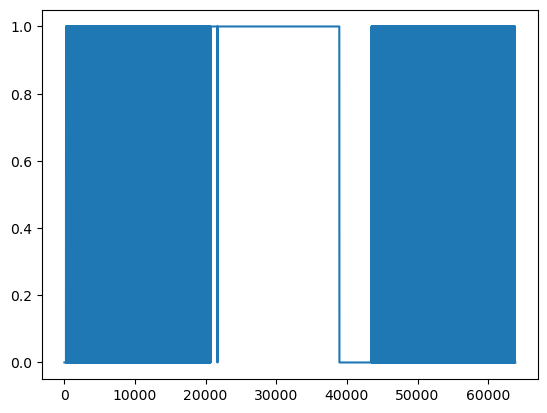

In [24]:
%matplotlib inline
plt.plot(behavior['Miniscope record active'])
plt.show()

In [65]:
scope_times['2I5']

{'7B6_2022_08_31_16_57_21':        Frame Number  Time Stamp (ms)  Buffer Index
 0                 0              -11             0
 1                 1               23             0
 2                 2               56             0
 3                 3               89             0
 4                 4              122             0
 ...             ...              ...           ...
 23233         23233           779995             0
 23234         23234           780029             0
 23235         23235           780062             0
 23236         23236           780096             0
 23237         23237           780129             0
 
 [23238 rows x 3 columns],
 '7B6_2022_08_31_18_00_16':        Frame Number  Time Stamp (ms)  Buffer Index
 0                 0       1560234.03             0
 1                 1       1560287.03             0
 2                 2       1560334.03             0
 3                 3       1560386.03             0
 4                 4       156043

In [46]:
behavior

,Time (s),Speed (m/s),Freezing,In Food Area,Bar Press active,Miniscope record active,Tone active
0,-30.678,NaN,0,0,0,0,0
1,-29.745,0.033,0,0,0,0,0
2,-29.633,0.028,0,0,0,0,0
3,-29.505,0.029,0,0,0,0,0
4,-29.377,0.023,0,0,0,0,0
...,...,...,...,...,...,...,...
71826,4528.683,0.031,0,0,0,1,0
71827,4528.811,0.045,0,0,0,1,0
71828,4528.955,0.041,0,0,0,1,0
71829,4529.083,0.040,0,0,0,1,0


In [34]:
timestamps

,Frame Number,Time Stamp (ms),Buffer Index
0,0,-11.000,0
1,1,23.000,0
2,2,56.000,0
3,3,89.000,0
4,4,122.000,0
...,...,...,...
37882,14644,1524355.526,0
37883,14645,1524404.526,0
37884,14646,1524454.526,0
37885,14647,1524505.526,0


### Spikes

In [159]:
tracealigned, labelsaligned = align_and_interpolate(animal_timestamps=timestamps, 
                                                    animal_behavior=behavior, 
                                                    tracenew=tracenew_spike, 
                                                    labelsnew=labelsnew_spike)

tracenew shape(29927, 139)
Cue(29937,)
Bar(29937,)
CATIME(29937,)
ENTERED PADDING
tracenew_padded:(29937, 139)


In [160]:
output_path_spike = os.path.join(id_path, "Spikes")

# Save spike
save_trace_and_labels(tracealigned, labelsaligned, output_path_spike, "2I5")

### Calcium

In [161]:
tracealigned, labelsaligned = align_and_interpolate(animal_timestamps=timestamps, 
                                                    animal_behavior=behavior, 
                                                    tracenew=tracenew_calcium, 
                                                    labelsnew=labelsnew_calcium)

tracenew shape(29927, 139)
Cue(29937,)
Bar(29937,)
CATIME(29937,)
ENTERED PADDING
tracenew_padded:(29937, 139)


In [163]:
output_path_calcium = os.path.join(id_path, "Calcium")

# Save calcium
save_trace_and_labels(tracealigned, labelsaligned, output_path_calcium, "2IH")

## Try Main Execute on All Animal IDs

In [191]:
execute(exp_path=exp_path, id_path=id_path, beh_path=beh_path, experiment=experiment, num_processes=1, verbose=True)

Experiment path: /scratch/09656/dhh3/Satiation/
Id path: /scratch/09656/dhh3/calcium-behavior-alignment/
Behavior path: /scratch/09656/dhh3/Behavior_Files/
Found 16 animal IDs
Animal IDs: dict_keys(['4N6', '2I5', '4B6', '5B6', '2S5', '1H6', '7M6', '7B6', '1I5', '1B6', '6M6', '6S5', '2N6', '2Z4', '8H6', '1S5'])
Found 12 animal IDs with two entries
Found 4 animal IDs with one entry
Erronous animal IDs: None
Processing and aligning 16 animal IDs with 1 process(es)


Processing animal ID 4N6
Minian dataset path /scratch/09656/dhh3/calcium-behavior-alignment/4N6/minian not found for animal ID 4N6


Processing animal ID 2I5
Combining Data (2I5): Behavior end of recording: -1
Combining Data (2I5): Timestamp last value 4743.918
Combining Data (2I5): breaks: [14821] -> recording sections: [(221, 14821), (43237, 64022)]
Saved 2I5 Calciums to /scratch/09656/dhh3/calcium-behavior-alignment/Calcium
Saved 2I5 Spikes to /scratch/09656/dhh3/calcium-behavior-alignment/Spikes
Successfully aligned animal

[(False, '4N6'),
 (True, '2I5'),
 (True, '4B6'),
 (True, '5B6'),
 (True, '2S5'),
 (True, '1H6'),
 (True, '7M6'),
 (True, '7B6'),
 (True, '1I5'),
 (True, '1B6'),
 (True, '6M6'),
 (True, '6S5'),
 (False, '2N6'),
 (True, '2Z4'),
 (False, '8H6'),
 (True, '1S5')]